# Interactive charting with PyPlot

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn', u'seaborn-poster', u'seaborn-bright', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


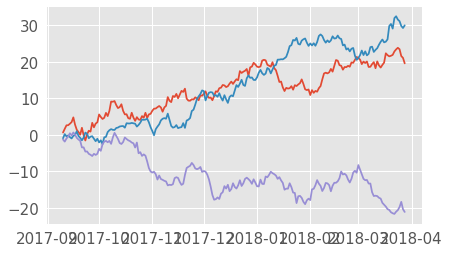

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt # this is more interactive, for complex, use OO API

%matplotlib inline

print(plt.style.available)
plt.style.use('ggplot')
#plt.style.use('seaborn-paper')
#plt.style.use('fivethirtyeight')


# create data
x = pd.period_range(pd.datetime.now(), periods=200, freq='d')
x = x.to_timestamp().to_pydatetime()
np.random.seed(94022)
y = np.random.randn(200, 3).cumsum(0)

plt.plot(x,y)

In [23]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn', u'seaborn-poster', u'seaborn-bright', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


### Customization options in Matplotlib

In [24]:
# Method #1
# specify in a matplotlibrc file

# Method #2
# change defaults programmatically
if False:
    mpl.rcParams['lines.linewidth'] = 2
    mpl.rcParams['lines.color'] = 'r' #red

# Method #3
# grab the currently active figure and manipulate it directly
if False:
    plt.rcParams['figure.figsize'] = (8, 4) # 8 inches by 4 inches
    plt.gcf().set_size_inches(8,4) # gcf == get current figure

### Labels and other elements

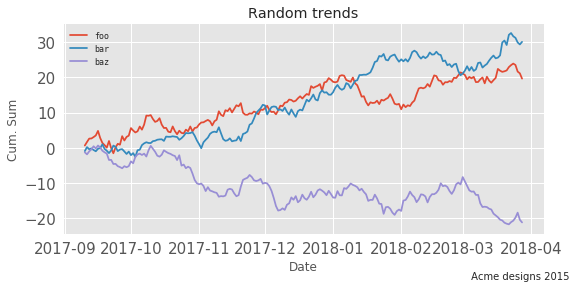

In [25]:
# plt.plot returns the Line2D objects it creates
plots = plt.plot(x,y)

plt.legend(plots, ('foo', 'bar', 'baz'),
          loc='best',
          framealpha=0.5,
          prop={'size':'small', 'family':'monospace'})
plt.gcf().set_size_inches(8,4) # gcf is get current figure
plt.title('Random trends')
plt.xlabel('Date')
plt.ylabel('Cum. Sum')
plt.grid(True)
plt.figtext(0.995, 0.01, u' Acme designs 2015', ha='right', va='bottom')
plt.tight_layout() #makes sure all labels/legends inside the figure

### Saving the chart

In [26]:
plt.savefig('mpl_3lines_custom.svg') # supports png, pdf, ps, eps, etc.

# Object Oriented Charting for more complexity
## Single plot -- inset axes
(uses the object oriented api)

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


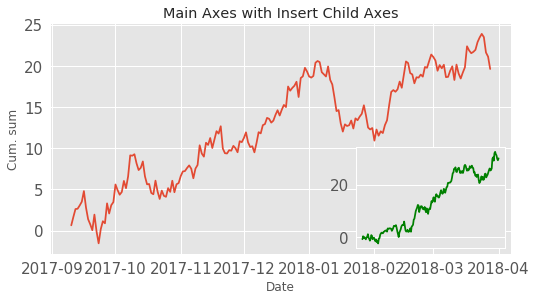

In [27]:
# Create a figure object.  These share a subset of properties
# with the global pyplot module.
fig = plt.figure(
    figsize=(8,4), # in inches
    dpi=200, 
    tight_layout=True,
    linewidth=1,
    edgecolor='r'
)

# Add axes (allows fine-grained control of positioning which allows
# things like embedded graphs within a larger graph)
# Example of a smaller graph embedded inside
fig = plt.figure(figsize=(8,4), tight_layout=True, edgecolor='r')
# -- Main axes
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) #uses a 0->1 coord system
                                       #[left(w*0.1), bottom(h*0.1), width(w*0.8), height(h*0.8)]
ax.set_title('Main Axes with Insert Child Axes')
ax.plot(x, y[:, 0]) # select first column of y data
ax.set_xlabel('Date')
ax.set_ylabel('Cum. sum')
# -- Inserted axes
ax = fig.add_axes([0.63, 0.12, 0.26, 0.35]) # left, bottom, width, height
ax.plot(x, y[:,1], color='g') #green
ax.set_xticks([]); #removes x ticks and labels

## Multiple subplots in a figure
(Uses the object oriented API)

In [28]:
y.transpose().shape

(3, 200)

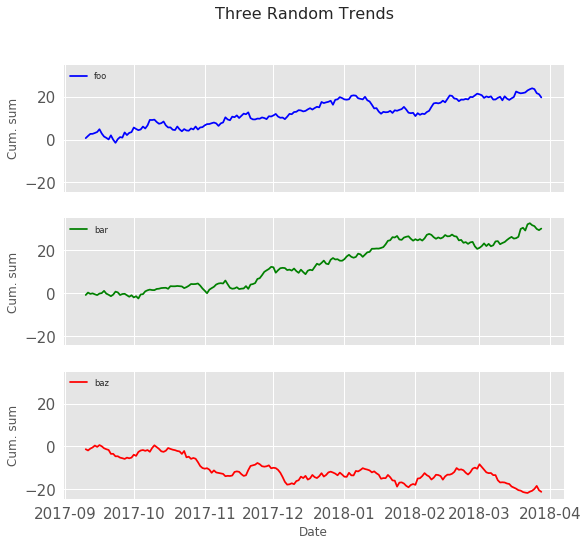

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=1,
                        sharex=True, sharey=True,
                        figsize=(8, 8))     # returns fig and array of axes (3 of them in this case)
labelled_data = zip(y.transpose(), # shape (200, 3) -> (3, 200)
                   ('foo', 'bar', 'baz'), # labels each get a row of 200 entries & color below
                    ('b', 'g', 'r')) 
fig.suptitle('Three Random Trends', fontsize=16)
for i, ld in enumerate(labelled_data):
    ax = axes[i]
    ax.plot(x, ld[0], label=ld[1], color=ld[2])
    ax.set_ylabel('Cum. sum')
    ax.legend(loc='upper left', framealpha=0.5,
             prop={'size':'small'})
axes[-1].set_xlabel('Date')

## Bar chart
(uses the *pyplot* api)

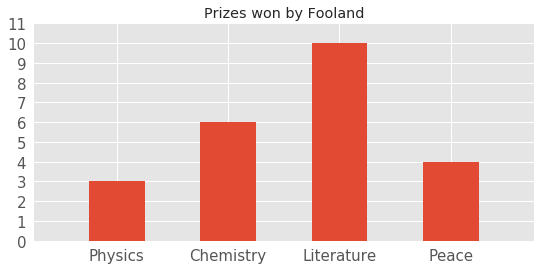

In [30]:
labels = ['Physics', 'Chemistry', 'Literature', 'Peace']
foo_data = [3, 6, 10, 4]

bar_width = 0.5
xlocations = np.array(range(len(foo_data))) + bar_width # must calc this yourself. this is handy formula
plt.bar(xlocations, foo_data, width=bar_width, align='edge')
plt.yticks(range(0,12))
plt.xticks(xlocations + bar_width/2, labels) # place ticks in middle of bars
plt.xlim(0, xlocations[-1] + bar_width*2) # set x limits to allow for right and left padding of 1 bar width
plt.title('Prizes won by Fooland')
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.gcf().set_size_inches((8,4))

## Grouped Bar Chart
(uses the object oriented api)

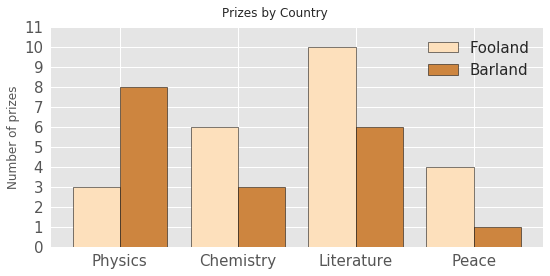

In [31]:
labels = ['Physics', 'Chemistry', 'Literature', 'Peace']
foo_data = [3, 6, 10, 4]
baz_data = [8, 3, 6, 1]

fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.4 # with width of 1 for bar groups, this gives padding of 0.1
xlocs = np.arange(len(foo_data))
ax.bar(xlocs - bar_width, foo_data, bar_width, align='edge',
      color='#fde0bc', edgecolor='black', label='Fooland')
ax.bar(xlocs, baz_data, bar_width, align='edge',
      color='peru', edgecolor='black', label='Barland')
# -- ticks, labels, grids, and title
ax.set_yticks(range(12))
ax.set_xticks(ticks=range(len(foo_data)))
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Number of prizes')
fig.suptitle('Prizes by Country')
fig.tight_layout(pad=2)
fig.savefig('mpl_barchart_multi.png', dpi=200)

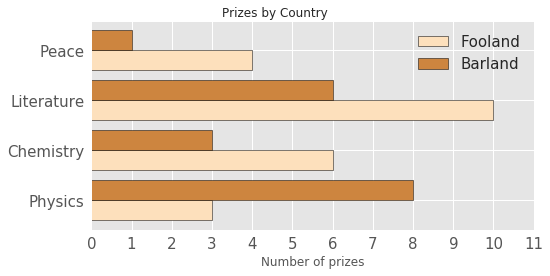

In [32]:
labels = ['Physics', 'Chemistry', 'Literature', 'Peace']
foo_data = [3, 6, 10, 4]
baz_data = [8, 3, 6, 1]

fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.4 # with width of 1 for bar groups, this gives padding of 0.1
xlocs = np.arange(len(foo_data))
ax.barh(xlocs - bar_width, foo_data, bar_width, align='edge',  # 1. Use barh instead of bar
      color='#fde0bc', edgecolor='black', label='Fooland')
ax.barh(xlocs, baz_data, bar_width, align='edge',
      color='peru', edgecolor='black', label='Barland')
# -- ticks, labels, grids, and title
ax.set_xticks(range(12))                                       # 2. swap x and y axis
ax.set_yticks(ticks=range(len(foo_data)))
ax.set_yticklabels(labels)
ax.xaxis.grid(True)
ax.legend(loc='best')
ax.set_xlabel('Number of prizes')
fig.suptitle('Prizes by Country')
fig.tight_layout(pad=2)

## Stacked Bars

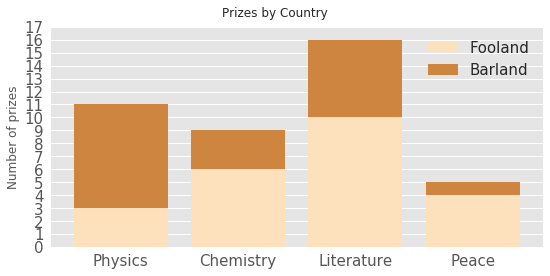

In [33]:
labels = ['Physics', 'Chemistry', 'Literature', 'Peace']
foo_data = [3, 6, 10, 4]
baz_data = [8, 3, 6, 1]

fig, ax = plt.subplots(figsize=(8, 4))
# ...
bar_width = 0.8
xlocs = np.arange(len(foo_data))
ax.bar(xlocs, foo_data, bar_width, color='#fde0bc', label='Fooland', align='edge')
ax.bar(xlocs, baz_data, bar_width, color='peru',
      label='Barland', bottom=foo_data, align='edge')
# -- labels, grids and title, then save
ax.set_yticks(range(18))
ax.set_xticks(ticks=np.array(range(len(foo_data))) + bar_width/2)
ax.set_xticklabels(labels)
ax.set_xlim(-(1-bar_width), xlocs[-1]+1)
ax.xaxis.grid(False)
ax.legend(loc='best')
ax.set_ylabel('Number of prizes')
fig.suptitle('Prizes by Country')
fig.tight_layout(pad=2)


## Scatter Plots

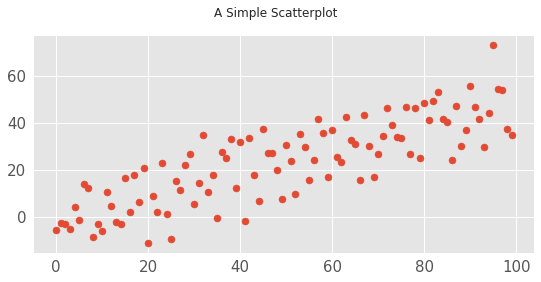

In [34]:
num_points = 100
gradient = 0.5

x = np.array(range(num_points))
y = np.random.randn(num_points) * 10 + x*gradient
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(x, y)
fig.suptitle('A Simple Scatterplot')

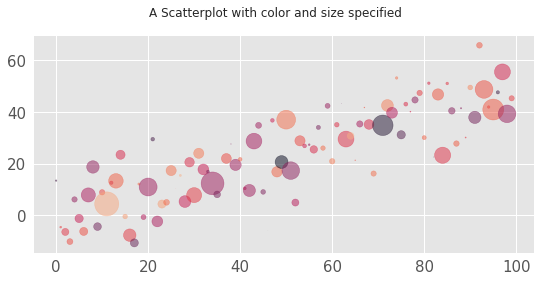

In [35]:
# add size and color options
num_points = 100
gradient = 0.5

x = np.array(range(num_points))
y = np.random.randn(num_points) * 10 + x*gradient
fig, ax = plt.subplots(figsize=(8,4))
colors = np.random.randn(num_points)
size = (2 + np.random.randn(num_points) * 8) ** 2 #sqr vals between 2 and 10
ax.scatter(x, y,  s=size, c=colors, alpha=0.5)
fig.suptitle('A Scatterplot with color and size specified')

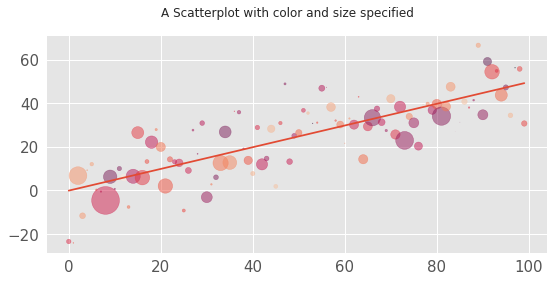

In [36]:
# Add a regression line (manually)
num_points = 100
gradient = 0.5

x = np.array(range(num_points))
y = np.random.randn(num_points) * 10 + x*gradient
fig, ax = plt.subplots(figsize=(8,4))
colors = np.random.randn(num_points)
size = (2 + np.random.randn(num_points) * 8) ** 2 #sqr vals between 2 and 10
ax.scatter(x, y,  s=size, c=colors, alpha=0.5)
fig.suptitle('A Scatterplot with color and size specified')

m, c = np.polyfit(x, y, 1)
ax.plot(x, m*x + c)

___
# Seaborn
___

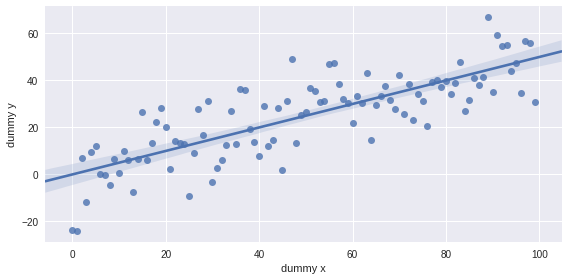

In [37]:
# linear regression plot with Seaborn
# NOTE the automatic confidence interval lines

plt.style.use('seaborn') # not required, but want to show standard look

data = pd.DataFrame({'dummy x':x, 'dummy y':y})
sns.lmplot('dummy x', 'dummy y', data, size=4, aspect=2)
plt.tight_layout()
plt.savefig('mpl_scatter_seaborn.png')

## FacetGrids in Seaborn
### (i.e. lattice or trellis plotting)

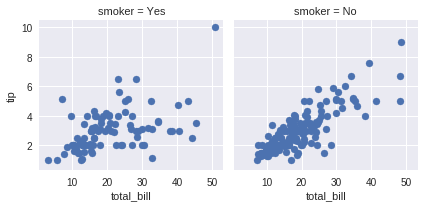

In [38]:
tips = sns.load_dataset('tips')

g = sns.FacetGrid(tips, col='smoker')
g.map(plt.scatter, 'total_bill', 'tip')

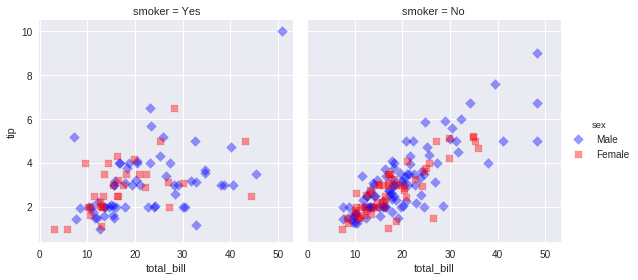

In [39]:
# add another dimension with color/marker
pal = dict(Female='red', Male='blue')
g = sns.FacetGrid(tips, col='smoker', hue='sex', 
                  hue_kws={'marker': ['D', 's']},
                  palette=pal, size=4, aspect=1)
g.map(plt.scatter, 'total_bill', 'tip', alpha=.4)
g.add_legend()

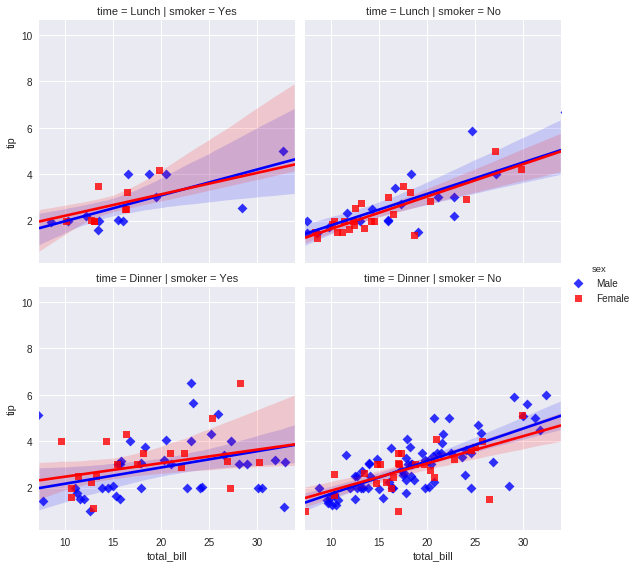

In [40]:
# add another dimension by specifying row
# NOTE, we're using sns.regplot now instead of plt.scatter
pal = dict(Female='red', Male='blue')
g = sns.FacetGrid(tips, col='smoker', hue='sex', row='time',
                  hue_kws={'marker': ['D', 's']},
                  palette=pal, size=4, aspect=1)
g.map(sns.regplot, 'total_bill', 'tip')
g.add_legend()

## PairGrids
### (summarize relationships between all the variables)

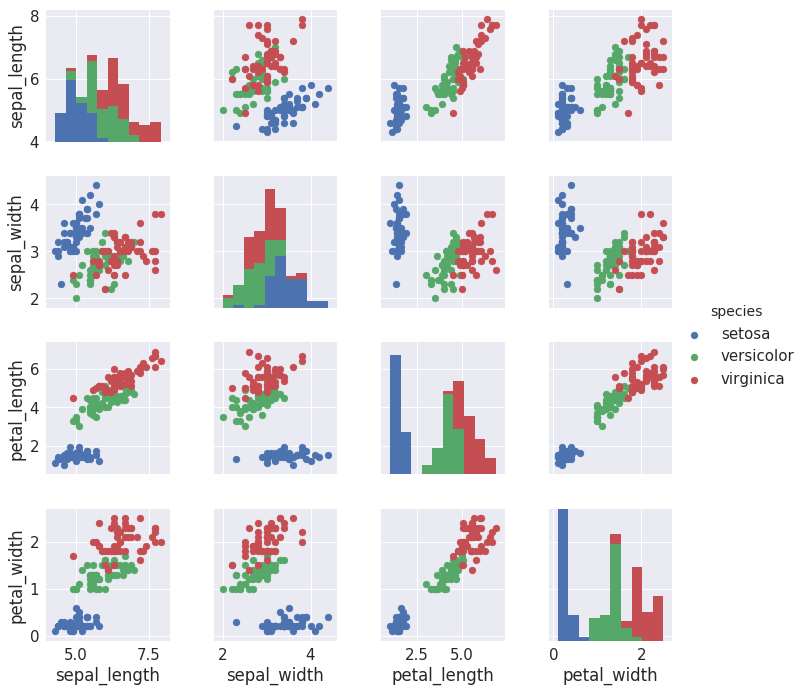

In [41]:
iris = sns.load_dataset('iris')
sns.set(font_scale=1.5)
g = sns.PairGrid(iris, hue='species')
g.map_diag(plt.hist) #specify the chart type for the diagonals
g.map_offdiag(plt.scatter)
g.add_legend()